In [1]:
using NPZ

In [7]:
using PyPlot
import PyPlot

In [3]:
Q1 = npzread("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/q_mpi_test.npy");
Q2 = npzread("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/q_mpi_test2.npy");
Q3 = npzread("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/q_mpi_test3.npy");

In [4]:
Q_comp = cat(dims=2,Q1,Q2);

In [5]:
Q_comp = cat(dims=2,Q_comp,Q3);

In [6]:
size(Q_comp)

(101, 998)

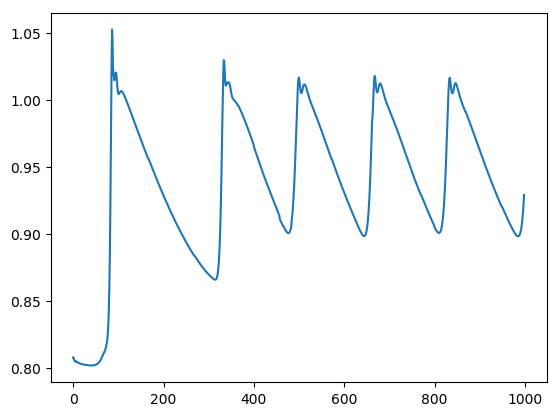

In [9]:
PyPlot.plot(LinRange(0,998,998),Q_comp[1,:])
PyPlot.show()

In [10]:
npzwrite("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/q_mpi.npy",Q_comp)

In [11]:
B1 = npzread("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/b_hat_rho_mpi_test.npy");
B2 = npzread("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/b_hat_rho_mpi_test2.npy");
B3 = npzread("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/b_hat_rho_mpi_test3.npy");

In [12]:
B_comp = cat(dims=4,B1,B2);

In [13]:
B_comp = cat(dims=4,B_comp,B3);

In [14]:
npzwrite("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/b_hat_rho_mpi.npy",B_comp)

In [15]:
using FFTW

In [16]:
F = fft(B_comp,[2,3])

101×65×65×998 Array{Complex{Float64},4}:
[:, :, 1, 1] =
 -1.38699e-20+0.0im  …  -1.53468e-21+7.5893e-22im
 -3.38322e-16+0.0im     -4.43343e-17-2.58763e-17im
  1.68669e-16+0.0im     -1.34692e-17+1.2384e-16im
  2.94457e-16+0.0im     -1.82399e-16-7.77458e-16im
  1.12124e-16+0.0im     -3.16467e-16-1.93803e-16im
 -3.64813e-16+0.0im  …  -2.89942e-16+9.88773e-16im
  6.91808e-17+0.0im      2.30664e-16+6.86899e-16im
   2.2164e-16+0.0im     -2.20749e-16-6.66209e-16im
  9.32764e-16+0.0im      -2.6979e-16-4.5301e-16im
 -1.05173e-15+0.0im      1.42556e-16+2.30985e-16im
 -1.63095e-16+0.0im  …  -1.35796e-16+1.45384e-15im
  1.56115e-15+0.0im     -7.84347e-16-1.98642e-16im
 -5.08628e-16+0.0im     -3.65717e-16+2.45173e-17im
             ⋮       ⋱  
  8.11661e-15+0.0im     -2.00487e-15+2.33121e-15im
 -1.18723e-14+0.0im  …     1.655e-15+2.7291e-15im
  3.29131e-15+0.0im     -3.60772e-15+2.05016e-15im
 -1.24372e-15+0.0im     -2.58252e-15+1.39627e-16im
  2.13848e-15+0.0im      8.00092e-15+3.01672e-15im
 -1.2

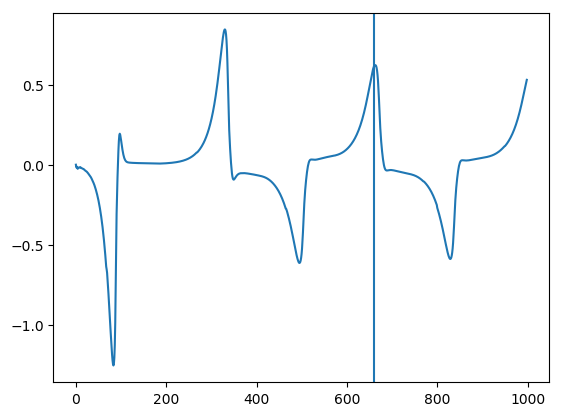

In [35]:
PyPlot.plot(LinRange(0,998,998),imag.(F[5,end,2,:]))
PyPlot.axvline(x=660)
PyPlot.show()

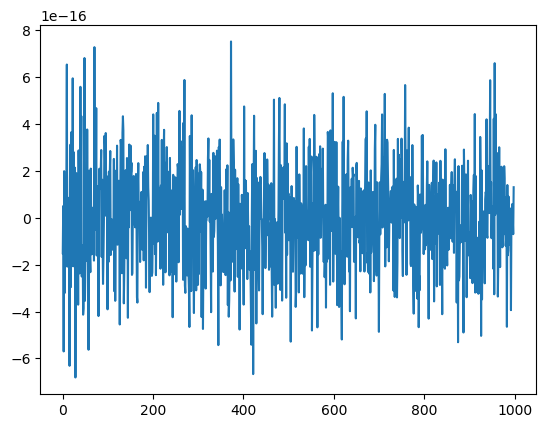

In [28]:
PyPlot.plot(LinRange(0,998,998),imag.(F[5,end-1,1,:]))
PyPlot.show()

Displays no n=0 component

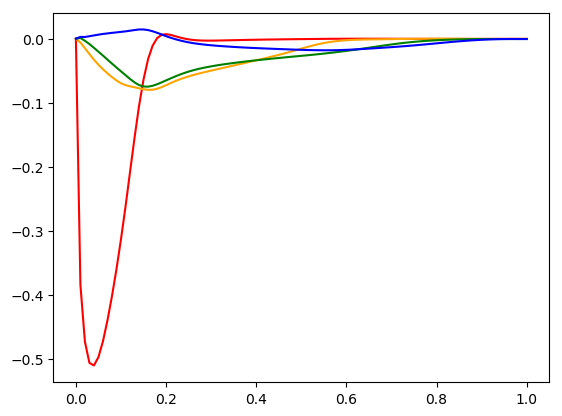

In [51]:
t=820
PyPlot.plot(LinRange(0,1,101),imag.(F[:,end,2,t]),"r")
PyPlot.plot(LinRange(0,1,101),imag.(F[:,end-1,2,t]),"orange")
PyPlot.plot(LinRange(0,1,101),imag.(F[:,end-2,2,t]),"g")
PyPlot.plot(LinRange(0,1,101),imag.(F[:,end-3,2,t]),"b")
PyPlot.show()

In [54]:
include("fftUtils.jl")
using .fftUtils

In [58]:
using Plots

In [59]:
using LaTeXStrings
using Statistics

## Pick a point in time to get mode distribution

In [55]:
Ft = F[:,:,:,660];

In [57]:
maxbnm = [];
ms = [];
ns = [];
Nm = size(Ft)[2];
Nn = size(Ft)[3];
for m in 1:size(Ft)[2]
    for n in 1:size(Ft)[3]
        max, maxInd = findmax(abs.(Ft[:,m,n]))
        append!(maxbnm,max)
        append!(ns,n_mode_num(n,Nn))
        append!(ms,m_mode_num(m,Nm))
    end
end

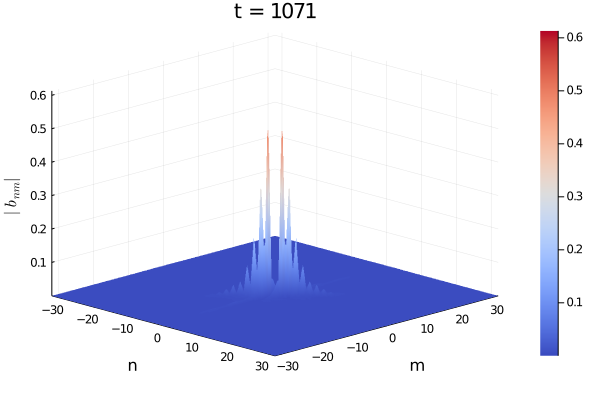

In [74]:
Plots.scatter(ns,ms,maxbnm,zlabel=L"|b_{nm}|",camera=(45,45),st=:surface,c=:coolwarm)
xlabel!("n")
ylabel!("m")
title!("t = 1071")

In [62]:
M_decomp = deepcopy(Ft);

In [75]:
m_list = []
F_dc = []
for m_ind in 1:size(M_decomp)[2]
    append!(m_list,m_mode_num(m_ind,Nm))
    append!(F_dc,abs(M_decomp[60,m_ind,2]))
end

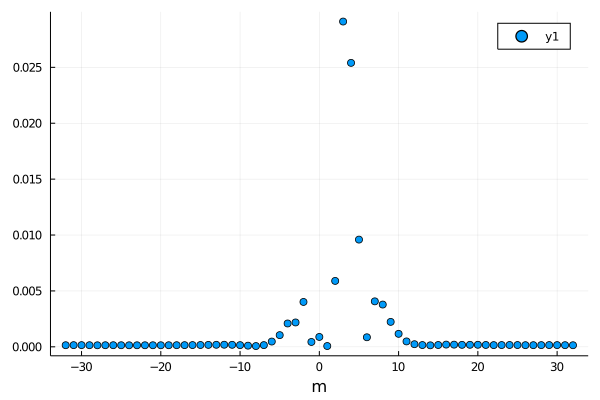

In [86]:
Plots.scatter(m_list,F_dc)
xlabel!("m")

In [83]:
n_list = []
F_dcn = []
for n_ind in 1:size(M_decomp)[3]
    append!(n_list,n_mode_num(n_ind,Nn))
    append!(F_dcn,abs(M_decomp[60,end,n_ind]))
end

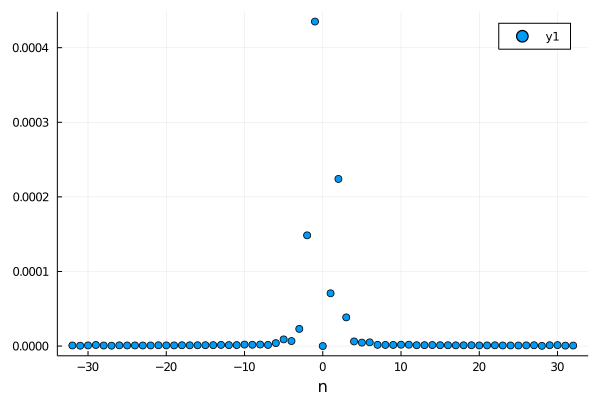

In [87]:
Plots.scatter(n_list,F_dcn)
xlabel!("n")